## Wapi Daktari : Public Healthcare Crowd-Management System

### Problem Statement

Most Kenyans visiting public hospitals;

- Don’t know if the doctor is available,
- How long the wait will be, or if they'll even be seen.
- They cant afford private healthcare or appointment systems.

This uncertainty wastes time, discourages care-seeking, and overloads hospitals randomly. There’s no access to real-time hospital insights especially for low-income patients without smartphones or internet access.

### Objective 

To empower walk-in patients at public hospitals with data-backed predictions on the best time to visit via a simple USSD interface that works on any phone. The goal is to reduce wasted time, manage hospital congestion, and improve access to care without requiring logins or apps.

Wapi Daktari Answers the question?

When is the best time for me to go to the hospiotal today?


## 1. Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loaded the dataset
df = pd.read_csv('../data/wapi_daktari_healthcare_dataset.csv')


In [4]:
# Displayed the first few rows of the dataset
df.head()

,hospital_name,date,day_of_week,is_weekend,is_holiday,is_strike_day,department,time_block,doctors_on_shift,expected_patients,...,national_events,average_waiting_time_last_week,average_patients_last_month,previous_day_waiting_time,previous_week_waiting_time,previous_month_waiting_time,doctors_on_shift_expected_patients,doctor_patient_ratio_congestion_level,flu_season,malaria_season
0,Mbagathi,2025-01-01,2,False,True,False,Pediatrics,Morning,0,86,...,0,106,78,110,113,103,0,0.0,1,0
1,Mbagathi,2025-01-01,2,False,True,False,Pediatrics,Afternoon,0,67,...,1,106,52,100,102,88,0,0.0,1,0
2,Mbagathi,2025-01-01,2,False,True,False,Pediatrics,Evening,0,68,...,1,114,59,119,115,104,0,0.0,1,0
3,Mbagathi,2025-01-01,2,False,True,False,Emergency,Morning,0,92,...,0,105,78,112,93,112,0,0.0,1,0
4,Mbagathi,2025-01-01,2,False,True,False,Emergency,Afternoon,0,70,...,1,110,66,102,98,100,0,0.0,1,0


In [5]:
df.describe()

,day_of_week,doctors_on_shift,expected_patients,actual_patients,waiting_time_minutes,doctor_arrival_delay,month,day,patient_load_ratio,doctor_patient_ratio,...,national_events,average_waiting_time_last_week,average_patients_last_month,previous_day_waiting_time,previous_week_waiting_time,previous_month_waiting_time,doctors_on_shift_expected_patients,doctor_patient_ratio_congestion_level,flu_season,malaria_season
count,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,...,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000,27375.000000
mean,2.997260,2.043836,64.140968,64.117516,58.507032,59.928183,6.526027,15.720548,0.999557,0.033302,...,0.499763,53.511123,54.034155,53.479416,48.546301,43.450776,133.519489,0.066604,0.246575,0.252055
std,1.997979,1.597417,15.405267,15.735332,26.642087,34.938651,3.447914,8.796408,0.053926,0.027046,...,0.500009,26.831209,16.920256,26.816332,27.338934,28.166409,115.920473,0.054093,0.431025,0.434200
min,0.000000,0.000000,35.000000,30.000000,30.000000,0.000000,1.000000,1.000000,0.857143,0.000000,...,0.000000,20.000000,11.000000,20.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,52.000000,52.000000,39.000000,30.000000,4.000000,8.000000,0.956522,0.012658,...,0.000000,35.000000,42.000000,35.000000,29.000000,24.000000,46.000000,0.025316,0.000000,0.000000
50%,3.000000,2.000000,65.000000,64.000000,49.000000,60.000000,7.000000,16.000000,1.000000,0.030769,...,0.000000,44.000000,53.000000,44.000000,40.000000,35.000000,112.000000,0.061538,0.000000,0.000000
75%,5.000000,3.000000,74.000000,74.000000,59.000000,90.000000,10.000000,23.000000,1.042553,0.052632,...,1.000000,56.000000,65.000000,56.000000,54.000000,53.000000,205.000000,0.105263,0.000000,1.000000
max,6.000000,5.000000,119.000000,120.000000,120.000000,120.000000,12.000000,31.000000,1.142857,0.166667,...,1.000000,120.000000,117.000000,120.000000,120.000000,120.000000,525.000000,0.333333,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27375 entries, 0 to 27374
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   hospital_name                          27375 non-null  object 
 1   date                                   27375 non-null  object 
 2   day_of_week                            27375 non-null  int64  
 3   is_weekend                             27375 non-null  bool   
 4   is_holiday                             27375 non-null  bool   
 5   is_strike_day                          27375 non-null  bool   
 6   department                             27375 non-null  object 
 7   time_block                             27375 non-null  object 
 8   doctors_on_shift                       27375 non-null  int64  
 9   expected_patients                      27375 non-null  int64  
 10  actual_patients                        27375 non-null  int64  
 11  wa

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.nunique()

hospital_name                                5
date                                       365
day_of_week                                  7
is_weekend                                   2
is_holiday                                   2
is_strike_day                                2
department                                   5
time_block                                   3
doctors_on_shift                             6
expected_patients                           84
actual_patients                             89
waiting_time_minutes                        62
peak_hour                                    2
doctor_available                             2
doctor_arrival_delay                       121
congestion_level                             1
month                                       12
day                                         31
patient_load_ratio                         588
doctor_patient_ratio                       310
holiday_strike_interaction                   1
expected_walk

### Dataset Overview
- The dataset has a total of 27375 entries, and 46 columns
- Data from 5 hospitals, 5 departments, over 365 days
- The dataset includes patient metrics, staff info, and environmental factors
- Temporal data: date, day of week, month, time blocks
- Some of the Key Metrics: waiting times (30-120 mins), doctors on shift (0-5), patients (30-120)
- Binary indicators for weekends, holidays, strikes, and seasons


## 2. Exploloratory Data Analysis

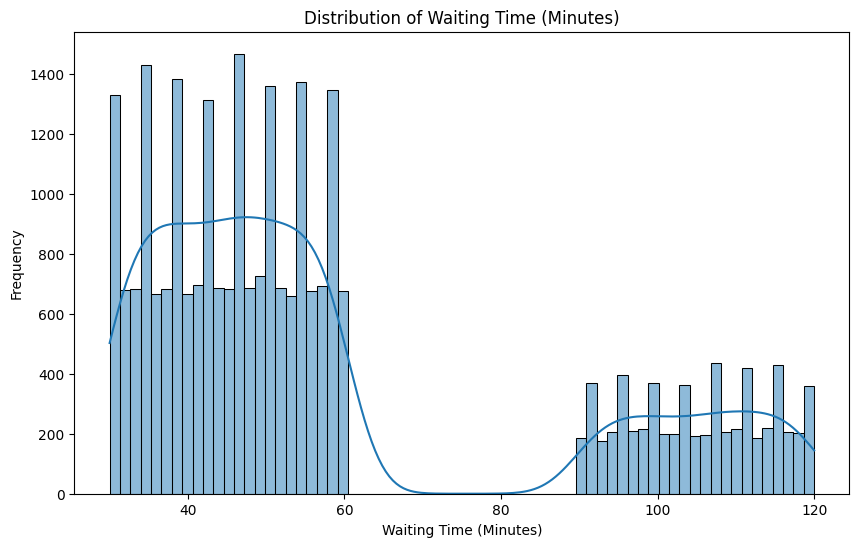

In [9]:
# Visualize the distribution of 'waiting_time_minutes'
plt.figure(figsize=(10, 6))
sns.histplot(df['waiting_time_minutes'], kde=True)
plt.title('Distribution of Waiting Time (Minutes)')
plt.xlabel('Waiting Time (Minutes)')
plt.ylabel('Frequency')
plt.show()

Observation:
- The main peak is centerered around 40-60 minutes, meaning most patients experience waiting times around this range.
- There are some outliers with extremely high waiting times.
- Theres asmaller peak around 100-200 minutes, meaning some patients experience longer waiting times.
- The y-axis shows that the most common waiting times for patients is around 40-60 minutes.
- There's also a noticeable gap between 60 and 90 minutes with very few patiets experiencing wait times in this range.

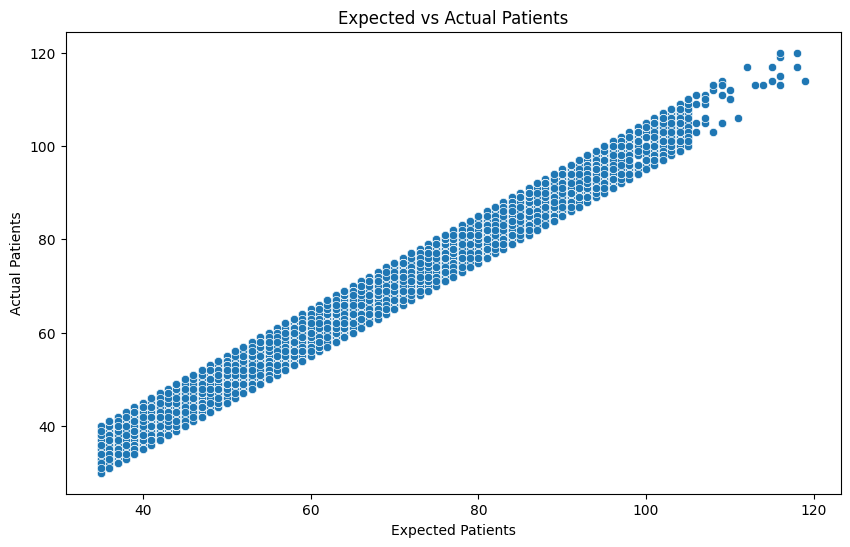

In [10]:
# Visualize the relationship between 'expected_patients' and 'actual_patients'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_patients', y='actual_patients', data=df)
plt.title('Expected vs Actual Patients')
plt.xlabel('Expected Patients')
plt.ylabel('Actual Patients')
plt.show()

Observation:
- The dots form a clear line from bottom-left to top-right, meaning expected and actual patient numbers are ver close.
- A few dots are off the line. Sometimes there are more or fewer patients than expected.
- The dots spread out more at the top-right, It's harder to predict when expeceting many patients.

In [11]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

/tmp/ipykernel_78812/3719194803.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time_block', y='expected_walk_ins', hue='day_of_week', data=df, ci=None)


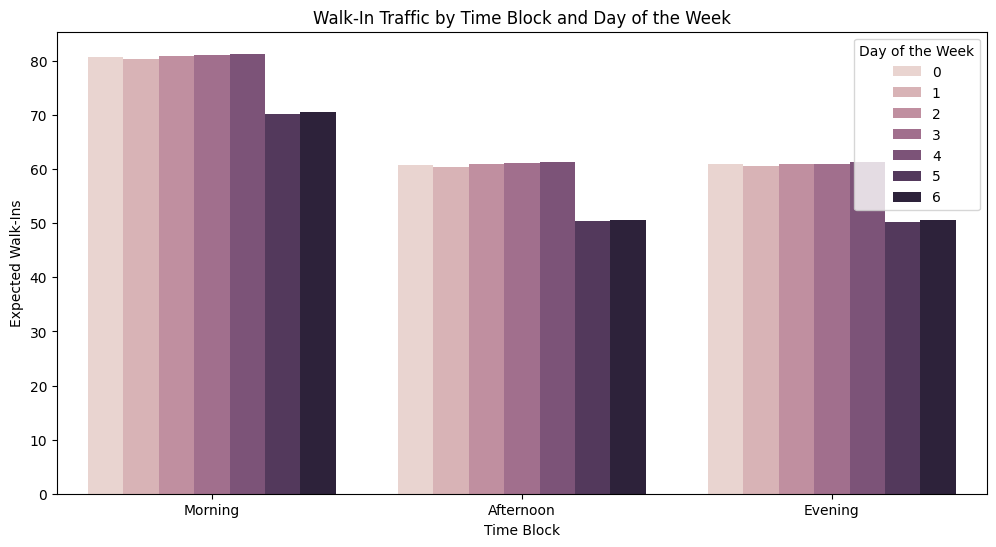

In [12]:
# Plot walk-in traffic by time block and day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='time_block', y='expected_walk_ins', hue='day_of_week', data=df, ci=None)
plt.title('Walk-In Traffic by Time Block and Day of the Week')
plt.xlabel('Time Block')
plt.ylabel('Expected Walk-Ins')
plt.legend(title='Day of the Week')
plt.show()

Observation:
- The graph is divided into time blocks, Morning, Afternoon and Evening.
- Each color represents days of the week.
- The morning has the highest walk-in traffic, followed by Afternoon and then Evening.
- Weekdays(middle colors) have higher walk-in traffic compared to weekends(darkest colors).
- Theres a slight right skew, with mornings having higher and more varied walk-in numbers.

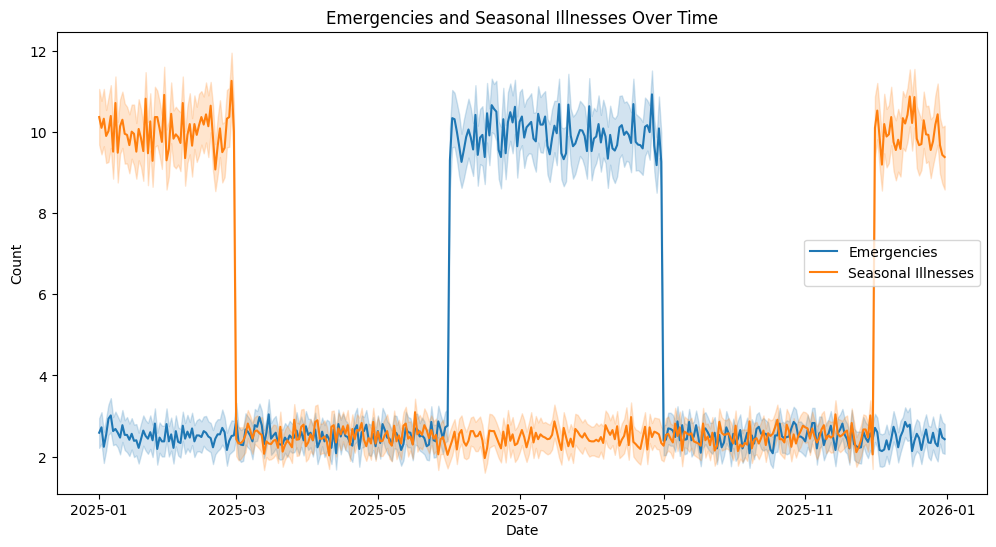

In [13]:
# Plot emergencies and seasonal illnesses over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='emergencies', data=df, label='Emergencies')
sns.lineplot(x='date', y='seasonal_illnesses', data=df, label='Seasonal Illnesses')
plt.title('Emergencies and Seasonal Illnesses Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

Observation:
- Blue line is for emergencies and the orange line represents seasonal illnesses.
- The graph covers from January 2025 to January 2026.
- There's a clear upward trend in emergencies and seasonal illnesses over time.
- Seasonal illnesses show clear peaks, likely corresponding to flu seasons.
- Both lines show daily fluctuations, with seasonal illnesses appearing more variable
- Inverse Relationship: When seasonal illnesses are high, emergencies tend to be low, and vice versa.

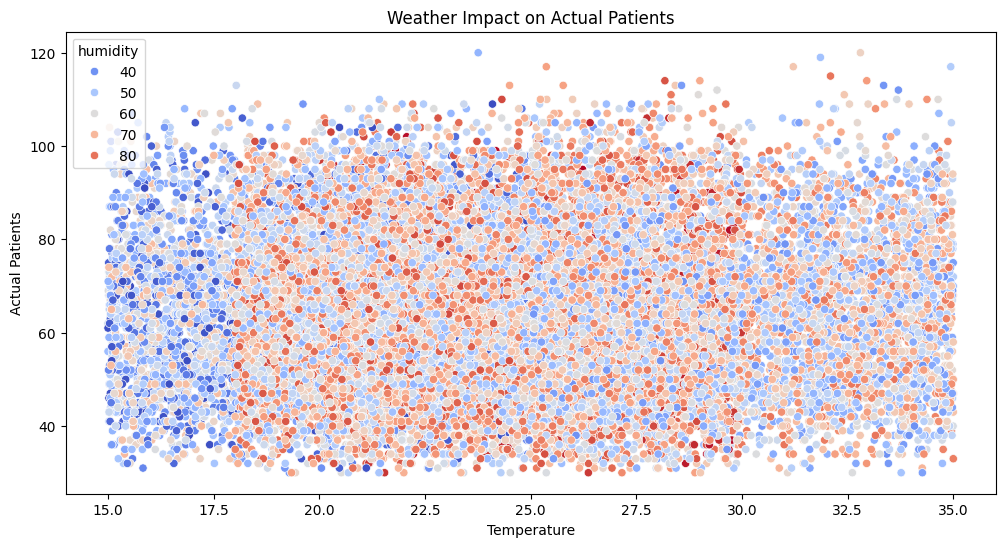

In [14]:
# Visualize the relationship between weather conditions and actual patients
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temperature', y='actual_patients', hue='humidity', data=df, palette='coolwarm')
plt.title('Weather Impact on Actual Patients')
plt.xlabel('Temperature')
plt.ylabel('Actual Patients')
plt.show()

Observation:
- Temprature ranges from about 15°C to 35°C.
- Actual Patients: Ranges from about 30 to 120 patients.
- There's a mix of humidity levels across all temperatures, indicated by varied colors.
- There's no clear linear trend between temperature and patient numbers.
- No clear pattern of humidity affecting patient numbers consistently across temperatures.


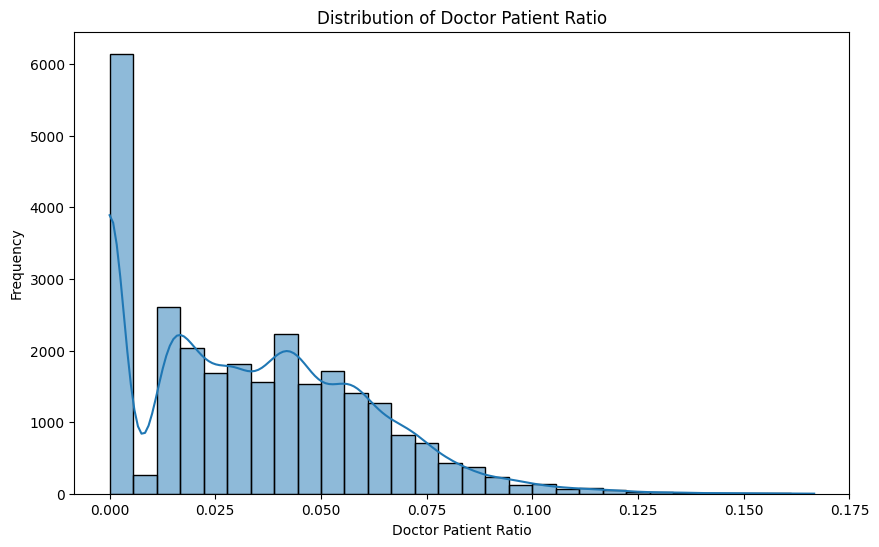

In [15]:
# Visualize the distribution of doctor patient ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['doctor_patient_ratio'], kde=True, bins=30)
plt.title('Distribution of Doctor Patient Ratio')
plt.xlabel('Doctor Patient Ratio')
plt.ylabel('Frequency')
plt.show()

Observation:
- The doctor-patient ratio ranges from about 0 to 0.175, with most values concentrated between 0 and 0.1
- The graph shows a bimodal distribution with two distinct peaks.
- There's a very high peak near 0, indicating a large number of instances where the doctor-patient ratio is extremely low
- After the second peak, there's a general declining trend in frequency as the ratio increases.
- The y-axis shows that the highest frequency is around 6000 for the first peak, while other peaks are much lower, mostly below 2000.


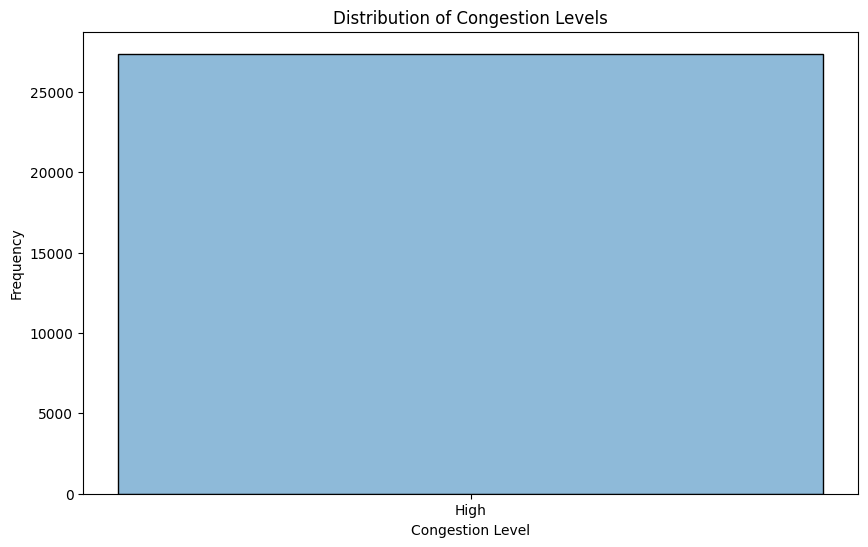

In [16]:
# Visualize the distribution of congestion levels
plt.figure(figsize=(10, 6))
sns.histplot(df['congestion_level'], kde=True, bins=30)
plt.title('Distribution of Congestion Levels')
plt.xlabel('Congestion Level')
plt.ylabel('Frequency')
plt.show()

Observation:
- The graph shows only one category of congestion level, which is "High". This suggests that the congestion level data might be categorical rather than continuous.
- There are no visible bars for other congestion levels, such as "Medium" or "Low".
- The presence of only one congestion level raises questions about the data quality or the way congestion levels are being categorized or recorded.
- This visualization suggests that there might be a need for data preprocessing or recategorization of the congestion levels 

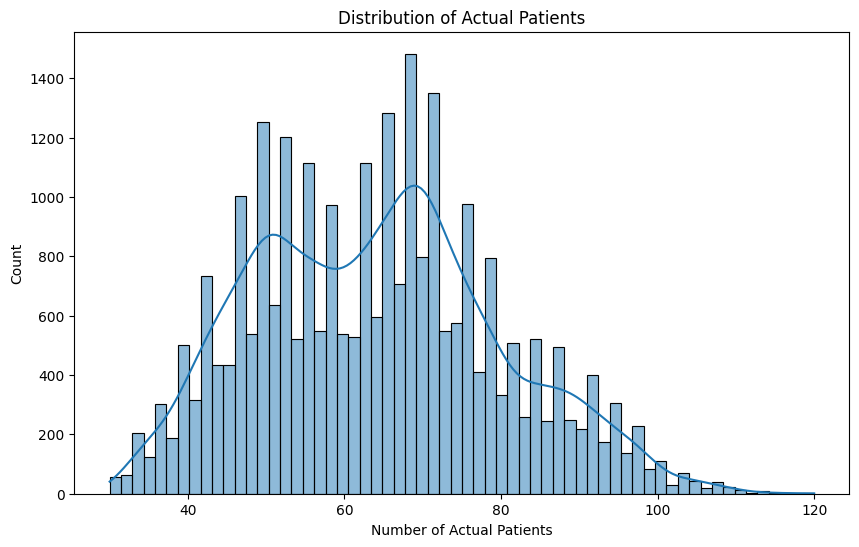

In [ ]:
# Distribution of Actual Patients to fix the High Congestion level problem
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_patients'], kde=True)
plt.title('Distribution of Actual Patients')
plt.xlabel('Number of Actual Patients')
plt.show()

Observation:
- After checking the dsitribution of actual patients, its clear the majority of the actual patients are above 30.
- The distribution ranges from 30 to 120 patients.
- Ajusting the thresholds in the determine_congestion_level function to better reflect the actual patient numbers.

In [24]:
# This adjustment sets the threshold to:
# Low congestion: Less than 50 patients
# Medium congestion: 50 to 79 patients
# High congestion: 80 or more patients

def determine_congestion_level(actual_patients):
    if actual_patients < 50:
        return 'Low'
    elif actual_patients < 80:
        return 'Medium'
    else:
        return 'High'

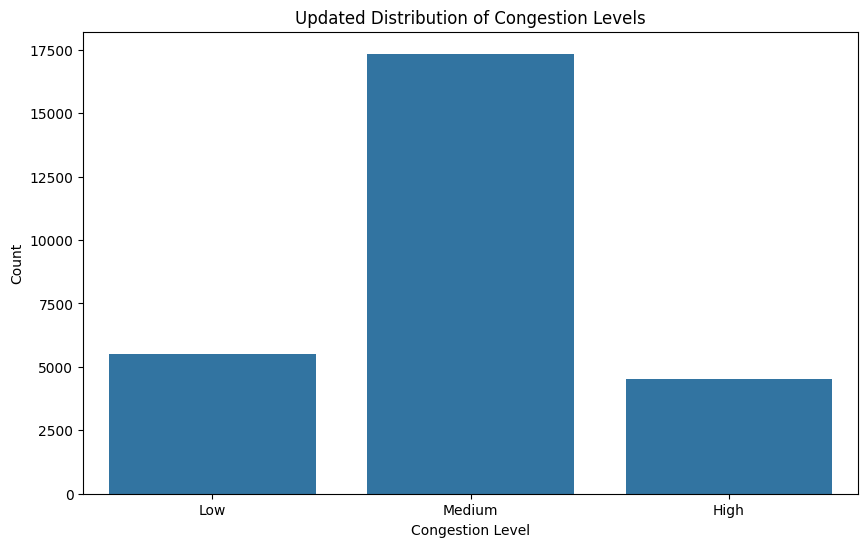

In [ ]:
# Applying the new congestion level function
df['congestion_level'] = df['actual_patients'].apply(determine_congestion_level)

# Visualized the updated distribution of congestion levels
plt.figure(figsize=(10, 6))
sns.countplot(x='congestion_level', data=df, order=['Low', 'Medium', 'High'])
plt.title('Updated Distribution of Congestion Levels')
plt.xlabel('Congestion Level')
plt.ylabel('Count')
plt.show()

Observation:
- The updated distribution shows that most patients experience medium or low congestion levels, with a few experiencing high congestion.
- This adjustment helps in better understanding the relationship between congestion levels and other factors in the hospital.
- Medium congestion is now the most common level.
- As much as the distribution is more balanced, theres still a significant skew towards medium congestion levels.

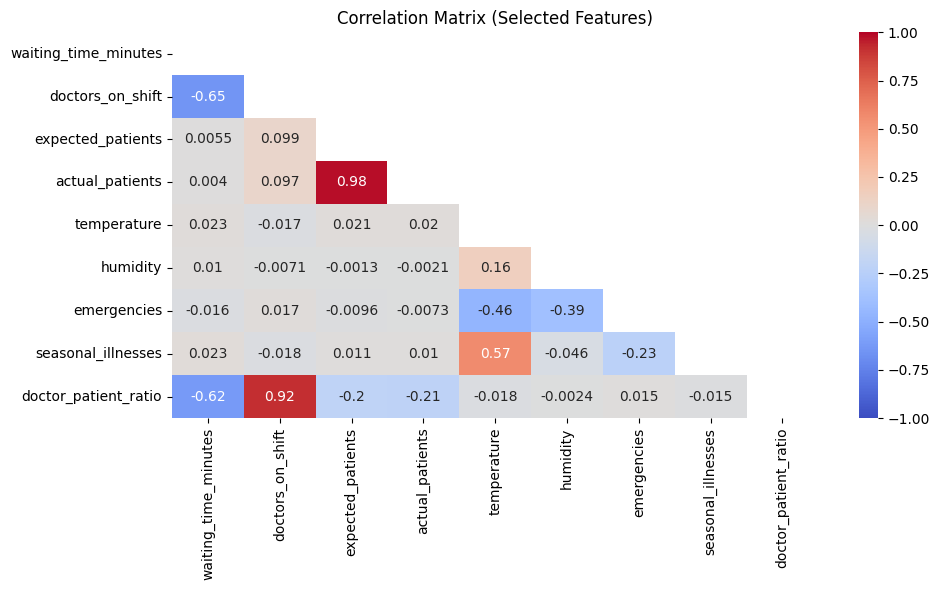

In [ ]:
# Selected the most relevant features
relevant_features = ['waiting_time_minutes', 'doctors_on_shift', 'expected_patients', 
                     'actual_patients', 'temperature', 'humidity', 'emergencies', 
                     'seasonal_illnesses', 'doctor_patient_ratio']

# Calculated correlation matrix for relevant features
corr = df[relevant_features].corr()

# Created a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix (Selected Features)')
plt.tight_layout()
plt.show()

Observation:
- There's a strong positive correlation (0.98) between expected and actual patients.
- Waiting time is negatively correlated (-0.65) with doctors on shift, suggesting more doctors reduce wait times.
- Temperature and humidity have a weak positive correlation (0.45) with expected and actual patients.

Overview and Insights from all the Visualizations:
- Waiting time is negatively correlated (-0.65) with doctors on shift, suggesting more doctors reduce wait times.
- The number of doctors on shift significantly impacts waiting times
- Weather conditions and seasonal illnesses play a role in patient influx, but their impact varies and isn't always straightforward.
- The adjusted congestion levels provide a more nuanced view of hospital capacity, which can later come in handy with resource allocation and patient guidance.